## Telecom Churn - ML Group Case Study
### Business Objective and Overview:
**The case study is to predict customer churn as per usage basis for prepaid customers for a Telecom company.**

We have been provided with the dataset containing customer-level information for a span of four consecutive months - June, July, August and September for a Telecom Company.

Customer behaviour plays an important role during churn and can be divided into 3 phases:
- The **good phase** where the customers are happy with the services provided and are loyal to the provider.
- The **action phase** where the customers start to rethink on the options and show different behaviour than the good phase.
- The **churn phase** where the customers actually leaves the exisiting provider and select a new provider.

**The business objective is to predict the churn in the last month using the data (features) from the first three months.**

In [1]:
#importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

In [2]:
#os.getcwd()
#os.chdir('C:\\Users\\bjtam\\Downloads')

In [3]:
#importing the data set
tel_data = pd.read_csv('./telecom_churn_data.csv')
tel_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
#checking the shape of the dataframe
print("Shape of dataframe:", tel_data.shape)

Shape of dataframe: (99999, 226)


In [5]:
#checking info of dataframe
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


#### We have imported the data set and we can see that the dataset has 226 columns and 99999 rows. 

Next, in our dataset we see that the primary key is the column Mobile number and we need to make sure that there is no duplicate data or rows for the same mobile number.

In [6]:
tel_data['mobile_number'].duplicated().sum()

0

**Hence we can see that there are no duplicate rows and we will now perform EDA on this data set.**

#### Next before we continue with EDA steps, we want to find out if we can already segregate and extract the data with information of only the high value customers.

We extract high value customers by:
- considering the features "total_rech_amt_6" and "total_rech_amt_7"
- adding a new feature as average of the recharge of these 2 months and then,
- considering the customers who have spent more than 70% of the average recharge column

But we can do this directly only when there are no missing values for the features "total_rech_amt_6" and "total_rech_amt_7" or else we need to first handling the missing values.

In [7]:
#checking for missing values for "total_rech_amt_6" and "total_rech_amt_7"

print("There are ",tel_data["total_rech_amt_6"].isnull().sum(), "missing values for total recharge amount column in June")
print("There are ",tel_data["total_rech_amt_7"].isnull().sum(), "missing values for total recharge amount column in July")

There are  0 missing values for total recharge amount column in June
There are  0 missing values for total recharge amount column in July


So we can go ahead with extracting only the high value customers and then perform EDA only on that data set.

In [8]:
average_cols = [word for word in list(tel_data.columns) if word.endswith('_6') or word.endswith('_7')]

In [9]:
average_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'arpu_6',
 'arpu_7',
 'onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_6',
 'offnet_mou_7',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_mou_6',
 'std_og_mou_7',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'og_others_6',
 'og_others_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'st

In [10]:
tel_data['2_months_avg'] = (tel_data['total_rech_amt_6']+tel_data['total_rech_amt_7'])/2

In [11]:
tel_data = tel_data[tel_data['2_months_avg'] >= tel_data['2_months_avg'].quantile(0.7)]

In [12]:
tel_data.shape

(30011, 227)

**Now that we have got the high value customers, we will continue to create a new column Churn where the customer has not utilised any services of the telecom company**

In [13]:
tel_data = tel_data.reset_index(drop = True)

In [14]:
tel_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,2_months_avg
0,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0
1,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,519.0
2,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,380.0
3,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0
4,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0


In [15]:
tel_data['Churn'] = pd.Series()
for i in range(0,len(tel_data['total_rech_amt_6'])):
    if (tel_data['total_ic_mou_9'][i] == 0 and tel_data['total_og_mou_9'][i] == 0 and tel_data['vol_2g_mb_9'][i] == 0 and tel_data['vol_3g_mb_9'][i] == 0):
        tel_data['Churn'][i] = 1   
    else :
        tel_data['Churn'][i] = 0

In [16]:
tel_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,2_months_avg,Churn
0,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1.0
1,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,519.0,0.0
2,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,380.0,0.0
3,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0,0.0
4,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0,0.0


In [17]:
print(tel_data['total_ic_mou_9'][0])
print(tel_data['total_og_mou_9'][0])
print(tel_data['vol_2g_mb_9'][0])
print(tel_data['vol_3g_mb_9'][0])

0.0
0.0
0.0
0.0


In [18]:
tel_data['Churn'].value_counts()/len(tel_data['Churn'])

0.0    0.913598
1.0    0.086402
Name: Churn, dtype: float64

Total Rows: 30011
Number of people who churned 2593
A total of 8.64016527273333 % customers are churners in the dataset


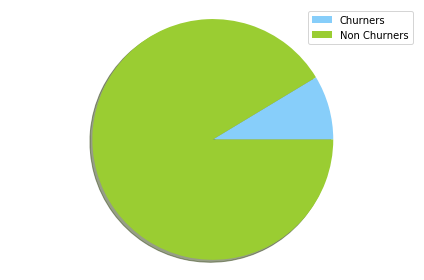

In [19]:
total_rows = len(tel_data["Churn"])
print("Total Rows:", total_rows)
count_churners = (tel_data["Churn"].values == 1).sum()
print("Number of people who churned", count_churners)
percent_calculation = (count_churners/total_rows)*100
print("A total of",percent_calculation,"% customers are churners in the dataset")
count_nonchurners = total_rows-count_churners

#Plotting the data in a pie chart
labels = ["Churners", "Non Churners"]
sizes = [count_churners, count_nonchurners]
colors = ['lightskyblue', 'yellowgreen']
patches, texts = plt.pie(sizes, colors=colors, shadow=True)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Hence,we can clearly see that there's a very huge imbalance in the dataset,with 0s equal to 91.36% and 1s equalling 8.64%.

In [20]:
cols_to_drop = [col for col in list(tel_data.columns) if col.endswith('_9')]
cols_to_drop

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [21]:
tel_data = tel_data.drop(cols_to_drop,axis=1)

In [22]:
tel_data.shape

(30011, 174)

### 1) Handling duplicate data ( data entry rows) :

Let's check for duplicate data now :

In [23]:
tel_data.duplicated().sum()

0

#### Thus,we can clearly see that there aren't any duplicate rows in the dataset.

### 2) Handling missing values :

In [24]:
cols_missing_values = list(tel_data.columns[tel_data.isnull().mean() > 0.35])

In [25]:
len(cols_missing_values)

30

In [26]:
tel_data = tel_data.drop(cols_missing_values,axis=1)

In [27]:
tel_data.shape

(30011, 144)

#### So we have removed all the columns which have more than 35% missing values as they are beyond imputation.So,now let's work on the remaining columns with missing values :

In [28]:
tel_data_missing = tel_data[list(tel_data.columns[tel_data.isnull().mean() > 0 ])]

In [29]:
tel_data_missing.shape

(30011, 95)

In [30]:
# Setting function in order to visualise all the features
pd.set_option('max_rows',95)

In [31]:
tel_data_missing.isnull().mean()

loc_og_t2o_mou          0.003799
std_og_t2o_mou          0.003799
loc_ic_t2o_mou          0.003799
last_date_of_month_7    0.001033
last_date_of_month_8    0.005231
onnet_mou_6             0.010529
onnet_mou_7             0.010096
onnet_mou_8             0.031255
offnet_mou_6            0.010529
offnet_mou_7            0.010096
offnet_mou_8            0.031255
roam_ic_mou_6           0.010529
roam_ic_mou_7           0.010096
roam_ic_mou_8           0.031255
roam_og_mou_6           0.010529
roam_og_mou_7           0.010096
roam_og_mou_8           0.031255
loc_og_t2t_mou_6        0.010529
loc_og_t2t_mou_7        0.010096
loc_og_t2t_mou_8        0.031255
loc_og_t2m_mou_6        0.010529
loc_og_t2m_mou_7        0.010096
loc_og_t2m_mou_8        0.031255
loc_og_t2f_mou_6        0.010529
loc_og_t2f_mou_7        0.010096
loc_og_t2f_mou_8        0.031255
loc_og_t2c_mou_6        0.010529
loc_og_t2c_mou_7        0.010096
loc_og_t2c_mou_8        0.031255
loc_og_mou_6            0.010529
loc_og_mou

In [32]:
tel_data_missing.dtypes

loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_7     object
last_date_of_month_8     object
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
loc_og_t2t_mou_6        float64
loc_og_t2t_mou_7        float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_6        float64
loc_og_t2m_mou_7        float64
loc_og_t2m_mou_8        float64
loc_og_t2f_mou_6        float64
loc_og_t2f_mou_7        float64
loc_og_t2f_mou_8        float64
loc_og_t2c_mou_6        float64
loc_og_t2c_mou_7        float64
loc_og_t2c_mou_8        float64
loc_og_mou_6            float64
loc_og_mou_7            float64
loc_og_m

#### Hence,we see that all of these columns have a very small percentage of their values missing.Hence,it wouldn't cause a great loss,if we drop the missing rows in these columns :

In [33]:
tel_data_NotMissing = tel_data[tel_data.isnull().sum(axis=1) == 0]

In [34]:
tel_data_NotMissing.shape

(28487, 144)

In [35]:
list(tel_data_NotMissing.columns[tel_data_NotMissing.isnull().sum() > 0])

[]

### 3) Handling datatypes :

In [36]:
# We've to convert all datetime columns to datetime formats :
tel_data_NotMissing['last_date_of_month_6'] = pd.to_datetime(tel_data_NotMissing['last_date_of_month_6'])
tel_data_NotMissing['last_date_of_month_7'] = pd.to_datetime(tel_data_NotMissing['last_date_of_month_7'])
tel_data_NotMissing['last_date_of_month_8'] = pd.to_datetime(tel_data_NotMissing['last_date_of_month_8'])
tel_data_NotMissing['date_of_last_rech_6'] = pd.to_datetime(tel_data_NotMissing['date_of_last_rech_6'])
tel_data_NotMissing['date_of_last_rech_7'] = pd.to_datetime(tel_data_NotMissing['date_of_last_rech_7'])
tel_data_NotMissing['date_of_last_rech_8'] = pd.to_datetime(tel_data_NotMissing['date_of_last_rech_8'])

In [37]:
type(tel_data_NotMissing['last_date_of_month_7'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [38]:
tel_data_NotMissing[['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].head(10)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-30,2014-07-31,2014-08-31,2014-06-27,2014-07-25,2014-08-26
1,2014-06-30,2014-07-31,2014-08-31,2014-06-25,2014-07-31,2014-08-30
2,2014-06-30,2014-07-31,2014-08-31,2014-06-20,2014-07-22,2014-08-30
3,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-31,2014-08-14
4,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-30,2014-08-25
5,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-31,2014-08-31
6,2014-06-30,2014-07-31,2014-08-31,2014-06-23,2014-07-17,2014-08-31
7,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-30,2014-08-26
8,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-28,2014-08-24
9,2014-06-30,2014-07-31,2014-08-31,2014-06-24,2014-07-22,2014-08-31


### 4) Feature Engineering :

In [39]:
print(tel_data_NotMissing['last_date_of_month_6'].value_counts())
print(tel_data_NotMissing['last_date_of_month_7'].value_counts())
print(tel_data_NotMissing['last_date_of_month_8'].value_counts())

2014-06-30    28487
Name: last_date_of_month_6, dtype: int64
2014-07-31    28487
Name: last_date_of_month_7, dtype: int64
2014-08-31    28487
Name: last_date_of_month_8, dtype: int64


#### Since,both of these features just contain the last day of the months July,and August,and don't have any variance,they are of no use to us.Hence,we drop them :

In [40]:
tel_data_NotMissing = tel_data_NotMissing.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)

In [41]:
tel_data_NotMissing['Days_betwn_6&7'] = tel_data_NotMissing['date_of_last_rech_7']-tel_data_NotMissing['date_of_last_rech_6']
tel_data_NotMissing['Days_betwn_7&8'] = tel_data_NotMissing['date_of_last_rech_8']-tel_data_NotMissing['date_of_last_rech_7']

In [42]:
tel_data_NotMissing = tel_data_NotMissing.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1)

In [43]:
type(tel_data_NotMissing['Days_betwn_6&7'][0])

pandas._libs.tslibs.timedeltas.Timedelta

In [44]:
tel_data_NotMissing['Days_betwn_6&7'].head()

0   28 days
1   36 days
2   32 days
3   31 days
4   30 days
Name: Days_betwn_6&7, dtype: timedelta64[ns]

In [45]:
tel_data_NotMissing['Days_betwn_6&7'] = tel_data_NotMissing['Days_betwn_6&7'].astype(str)
tel_data_NotMissing['Days_betwn_7&8'] = tel_data_NotMissing['Days_betwn_7&8'].astype(str)
tel_data_NotMissing['Days_betwn_6&7'] = tel_data_NotMissing['Days_betwn_6&7'].str.rstrip(' days 00:00:00.000000000')
tel_data_NotMissing['Days_betwn_7&8'] = tel_data_NotMissing['Days_betwn_7&8'].str.rstrip(' days 00:00:00.000000000')

In [46]:
tel_data_NotMissing['Days_betwn_6&7'].head()

0    28
1    36
2    32
3    31
4     3
Name: Days_betwn_6&7, dtype: object

In [47]:
tel_data_NotMissing['Days_betwn_6&7'] = tel_data_NotMissing['Days_betwn_6&7'].astype(float)
tel_data_NotMissing['Days_betwn_7&8'] = tel_data_NotMissing['Days_betwn_7&8'].astype(float)

In [48]:
tel_data_NotMissing.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7',
       ...
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', '2_months_avg', 'Churn', 'Days_betwn_6&7',
       'Days_betwn_7&8'],
      dtype='object', length=140)

In [49]:
#Describing the numerical columns of the data set so as to understand the behaviour of these columns
tel_data_NotMissing.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,2_months_avg,Churn,Days_betwn_6&7,Days_betwn_7&8
count,2.848700e+04,28487.0,28487.0,28487.0,28487.0,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,...,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000
mean,7.001227e+09,109.0,0.0,0.0,0.0,584.906157,597.143626,551.597014,296.930201,310.401194,...,0.146383,1279.162636,132.866144,136.587508,120.876655,6.797101,698.831098,0.061537,27.135711,26.706217
std,6.815641e+05,0.0,0.0,0.0,0.0,430.034924,461.236405,488.394273,457.517164,482.052667,...,0.993088,977.224772,394.146064,410.489232,387.936220,49.460867,491.935318,0.240317,10.634450,10.692662
min,7.000000e+09,109.0,0.0,0.0,0.0,-810.661000,-622.509000,-345.129000,0.000000,0.000000,...,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,368.500000,0.000000,1.000000,1.000000
25%,7.000649e+09,109.0,0.0,0.0,0.0,364.794500,371.715500,308.540000,43.470000,44.510000,...,0.000000,484.000000,0.000000,0.000000,0.000000,0.000000,450.750000,0.000000,26.000000,26.000000
50%,7.001238e+09,109.0,0.0,0.0,0.0,493.397000,498.078000,463.942000,128.740000,130.990000,...,0.000000,934.000000,0.000000,0.000000,0.000000,0.000000,571.000000,0.000000,31.000000,31.000000
75%,7.001814e+09,109.0,0.0,0.0,0.0,697.488000,704.694000,681.704000,355.495000,370.465000,...,0.000000,1959.500000,8.030000,3.510000,0.000000,0.000000,800.000000,0.000000,33.000000,33.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,41.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,37762.500000,1.000000,58.000000,61.000000


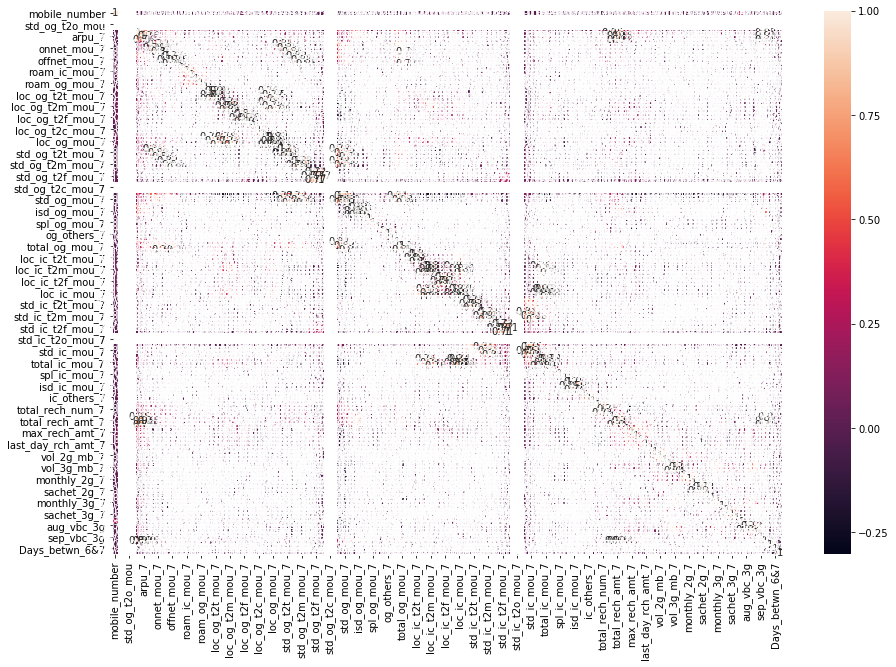

In [50]:
tel_data_NotMissing_corr = tel_data_NotMissing.corr()
plt.figure(figsize=[15,10])
sns.heatmap(tel_data_NotMissing_corr, annot=True)
plt.show()

### 5) Train-Test-Split :

In [59]:
y = tel_data_NotMissing['Churn']
X = tel_data_NotMissing.drop(['Churn'],axis=1)

In [57]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75,random_state = 100)

### 6) Scaling :

In [62]:
X_train.dtypes

mobile_number           int64
circle_id               int64
loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8      float64
loc_og_mou_6          float64
loc_og_mou

In [63]:
X_test.dtypes

mobile_number           int64
circle_id               int64
loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8      float64
loc_og_mou_6          float64
loc_og_mou

In [64]:
X_train_identfrs = X_train[['mobile_number','circle_id']] # keeping aside the identifiers for train data
X_train = X_train.drop(['mobile_number','circle_id'],axis=1)
X_test_identfrs = X_test[['mobile_number','circle_id']] # keeping aside the identifiers for test data
X_test = X_test.drop(['mobile_number','circle_id'],axis=1)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[list(X_train.columns)] = scaler.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = scaler.transform(X_test[list(X_test.columns)])

## 7) Principal Component Analysis :

### I'll allow the PCA algorithm to choose the number of features to get the desired variance,on it's own.hence,I'll employ :

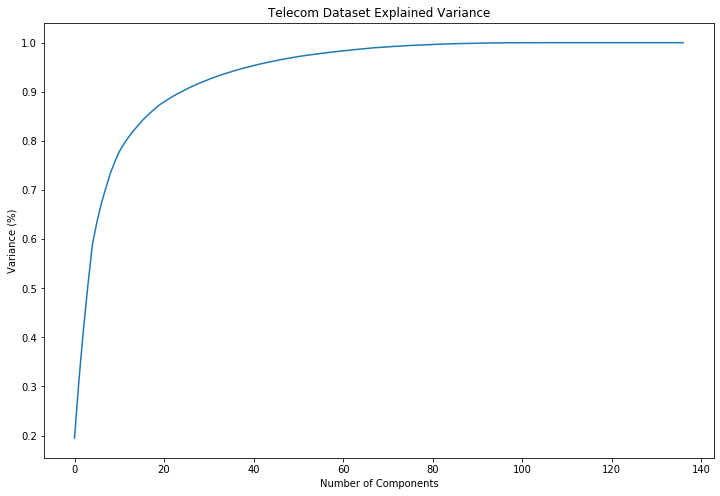

In [66]:
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Telecom Dataset Explained Variance')
plt.show()

#### Thus,more than 95% of the variance is explained by around 80 principal components. So,we'll use 80 components for building our model :

In [67]:
from sklearn.decomposition import IncrementalPCA
pca_model = IncrementalPCA(n_components=80)

In [68]:
X_train_pca = pca_model.fit_transform(X_train)
X_train_pca

array([[-1.00880589e-01,  3.00553733e-02, -2.41817984e-01, ...,
         5.42479374e-03,  8.55887546e-03,  6.04114029e-03],
       [-2.90154609e-01,  2.98267841e-01,  1.53721010e-01, ...,
         2.49064001e-04, -2.46931081e-03,  3.99120884e-03],
       [-1.97646322e-01,  7.44672254e-02, -1.75320408e-01, ...,
         2.83385701e-03,  1.03908867e-03, -3.16132962e-05],
       ...,
       [ 2.12872589e-01, -1.76614711e-02,  8.28726082e-02, ...,
        -9.80316761e-03,  3.44009281e-03, -1.33343017e-02],
       [ 1.21337513e-01,  8.08925261e-02, -1.93713709e-03, ...,
         7.21782709e-03,  4.09323082e-03,  5.67581023e-03],
       [ 1.42374623e-01, -3.45542941e-01,  6.52065417e-02, ...,
         4.94102216e-04, -1.35556543e-03,  2.32249258e-03]])

In [69]:
X_train_pca.shape

(21365, 80)

In [70]:
X_train_New = pd.DataFrame(X_train_pca)

In [71]:
X_train_New.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.100881,0.030055,-0.241818,0.102187,0.013227,-0.048047,-0.015531,-0.129940,-0.076492,0.053226,...,-0.001005,0.003442,0.016986,-0.001472,-0.004466,0.003740,0.003502,0.005425,0.008559,0.006041
1,-0.290155,0.298268,0.153721,-0.259829,0.161559,-0.024771,-0.094436,0.035653,0.027076,-0.030465,...,0.005774,-0.014913,-0.006209,0.000608,0.000169,-0.001233,-0.000907,0.000249,-0.002469,0.003991
2,-0.197646,0.074467,-0.175320,-0.088313,0.038029,-0.075047,0.007578,0.069228,0.047493,-0.008163,...,-0.001106,0.012063,0.062184,-0.001396,-0.000057,-0.001407,-0.003161,0.002834,0.001039,-0.000032
3,-0.248310,-0.426151,0.225289,-0.099826,-0.050343,0.017514,-0.071861,-0.174047,0.207786,0.009197,...,-0.055108,-0.005934,0.000507,0.015246,-0.002646,0.000737,0.000953,0.004403,0.006983,0.000186
4,-0.268051,0.010125,-0.048507,0.085818,0.055698,-0.014385,-0.073697,0.022049,-0.003649,-0.009601,...,0.003784,-0.003209,-0.008065,0.008554,0.004477,-0.000361,-0.000466,0.006574,-0.004400,-0.003285


In [72]:
X_train_New.shape

(21365, 80)

### Now,doing the same for the testing dataset :

In [73]:
X_test_pca = pca_model.transform(X_test)
X_test_pca

array([[-1.68002706e-01, -2.16894697e-01, -9.64285107e-02, ...,
        -4.55833191e-03, -8.32906209e-04, -7.39068180e-03],
       [-1.01467804e-01, -2.95324050e-02, -1.44628521e-01, ...,
        -7.98326809e-04, -2.52875414e-04,  1.35549825e-03],
       [-1.41025769e-01,  4.25003999e-01, -1.50551794e-01, ...,
        -2.34528070e-03, -1.33162758e-03,  1.82561181e-03],
       ...,
       [ 1.48140165e-01, -1.23710344e-02, -9.29317651e-02, ...,
         4.45090245e-04,  1.74402428e-03, -1.10084529e-03],
       [-1.84097516e-01, -1.61552314e-01, -1.44599545e-01, ...,
        -1.01809746e-03,  4.34279240e-06, -3.73826560e-05],
       [ 6.65450264e-02,  2.98322158e-01, -7.16139834e-02, ...,
        -5.14724056e-03,  8.61738938e-03, -5.67685473e-03]])

In [74]:
X_test_pca.shape

(7122, 80)

In [75]:
#X_test_pca = np.transpose(X_test_pca)
X_test_New = pd.DataFrame(X_test_pca)
X_test_New.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.168003,-0.216895,-0.096429,-0.435268,-0.180325,-0.074574,-0.036162,0.000380,-0.113283,-0.084084,...,0.004661,0.002101,-0.002162,0.001459,0.005725,0.006136,-0.015385,-0.004558,-0.000833,-0.007391
1,-0.101468,-0.029532,-0.144629,0.073907,-0.071529,-0.086020,-0.009331,0.017069,0.084567,-0.014035,...,-0.000834,0.003720,0.003736,0.000371,0.000949,-0.001486,0.000976,-0.000798,-0.000253,0.001355
2,-0.141026,0.425004,-0.150552,-0.254297,0.073754,0.092143,0.005084,0.156209,0.132402,0.155502,...,0.003215,-0.008585,-0.028329,0.002763,0.002462,-0.000973,0.001408,-0.002345,-0.001332,0.001826
3,-0.053522,-0.087662,-0.163454,0.094571,-0.071510,-0.062447,0.033551,-0.071815,0.072225,0.003339,...,-0.003583,-0.005065,0.005960,0.004742,0.002697,-0.001802,0.003777,-0.001124,0.000315,0.004504
4,-0.021145,0.093181,-0.041286,0.009937,0.079219,-0.049474,-0.045771,-0.036502,-0.042017,-0.163874,...,-0.019602,-0.000137,-0.000425,-0.004244,-0.026923,-0.006011,0.007613,-0.029431,0.003068,0.002477


In [76]:
X_test_New.shape

(7122, 80)

## 8) Modelling I  :

## Without resampling (keeping the datasets as they are) :

### In this Modelling I part ,we've created the following models :
 1. Support Vector Machine (SVM) : This is because SVMs and RBFs in particular give a great accuracy,as they separate the data into classes by creating a line or a hyperplane. And also they have the parameter 'class_weight',which if chosen as balanced will give a weightage to our target classes which is inversely proportional to the probability of their occurences.Thus,in this way the high class imbalances can be handled,upto some extent.
 
 2. RandomForest Classifier : RFCs generally give good results,as they average out the results of many trees,and thus also create a generalised model,and prevent overfitting. Secondly,like SVMs,RandomForest Classifier also has the parameter 'class_weight' which is being used to handle class imbalance to some extent.
 
 Thus,these were the only models we've used to carry out modelling without resampling the parent data,and keeping it as it is.

### I. SVM (Support Vector Machine) Model :

In [77]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

### In case of SVM,we're not performing hyperparameter testing as RBF (Radial Basis Function) method is anyways the most apt and efficient :

In [78]:
svc = svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced',probability=True)
svc.fit(X_train_New,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [79]:
y_pred = svc.predict(X_test_New)

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.92      6688
         1.0       0.27      0.72      0.40       434

    accuracy                           0.87      7122
   macro avg       0.63      0.80      0.66      7122
weighted avg       0.94      0.87      0.89      7122



### Hence,we can clearly see that the accuracy is pretty high with SVM.Also,'Recall' is pretty decent,considering that the number of observations which actually had the target variable as 'Churned' were very low.
### However,'Precision' is not very good. But,it is rather useful to us in this case,as we can still work harder and take extra care for our customers who are actually not going to churn,but we can't leave without taking extra care for those who are actually likely to churn.

### Hence,we see that we have achieved a high accuracy of 86.65%,and a recall and precision of 72.35% and 27.42% respectively. Let's go ahead with our next approach,in case we can improvise these results :

### II. RandomForest Classification :

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf = RandomForestClassifier(n_jobs=-1,class_weight = 'balanced',random_state=0) # For Handling Imbalance in Target variable.
param_grid = {'max_depth':[2,3,4],
              'n_estimators':[50,80,100],
             'max_features':[0.3,0.4,0.5]} 
grid_search = GridSearchCV(estimator = rf,param_grid=param_grid,cv = 5,scoring = 'recall', n_jobs=-1,verbose=1)
grid_search.fit(X_train_New,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  8.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             ii

In [84]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7103792622572672
{'max_depth': 2, 'max_features': 0.3, 'n_estimators': 100}


In [85]:
rf = RandomForestClassifier(max_depth=4,max_features=0.5,n_estimators=100,class_weight='balanced',n_jobs=-1,random_state=0)
rf.fit(X_train_New,y_train)
y_pred_New = rf.predict(X_test_New)

In [87]:
#print(classification_report(y_test_New,y_pred_New))
print(classification_report(y_test,y_pred_New))

              precision    recall  f1-score   support

         0.0       0.98      0.82      0.90      6688
         1.0       0.21      0.74      0.33       434

    accuracy                           0.82      7122
   macro avg       0.60      0.78      0.61      7122
weighted avg       0.93      0.82      0.86      7122



## 9) Modelling II  :

## With Resampling (Downsampling the majority class,in order to match the minority class;and for computational efficiency) :

### Now,since the number of samples are too large ,so we'll choose downgrading over upgrading.

In [88]:
# Dividing the training set into majority and minority target variables :
tel_data_NotMissing_majority = tel_data_NotMissing[tel_data_NotMissing['Churn']==0]
tel_data_NotMissing_minority = tel_data_NotMissing[tel_data_NotMissing['Churn']==1]

In [89]:
tel_data_NotMissing_minority.shape

(1753, 140)

In [90]:
tel_data_NotMissing_majority.shape

(26734, 140)

In [91]:
from sklearn.utils import resample

In [92]:
# Downgrading the majority sample
tel_data_NotMissing_majority = resample(tel_data_NotMissing_majority,n_samples = 1753,replace=False,random_state=123)

In [93]:
tel_data_balanced = pd.concat([tel_data_NotMissing_majority,tel_data_NotMissing_minority],axis=0)

In [94]:
tel_data_balanced = tel_data_balanced.reindex()

In [95]:
tel_data_balanced.shape

(3506, 140)

In [96]:
y = tel_data_balanced['Churn']
X = tel_data_balanced.drop(['Churn'],axis=1)

In [97]:
X_train_New_1,X_test_New_1,y_train_New,y_test_New = train_test_split(X,y,train_size=0.75,random_state=123)

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_New_1 = scaler.fit_transform(X_train_New_1)
X_test_New_1 = scaler.transform(X_test_New_1)

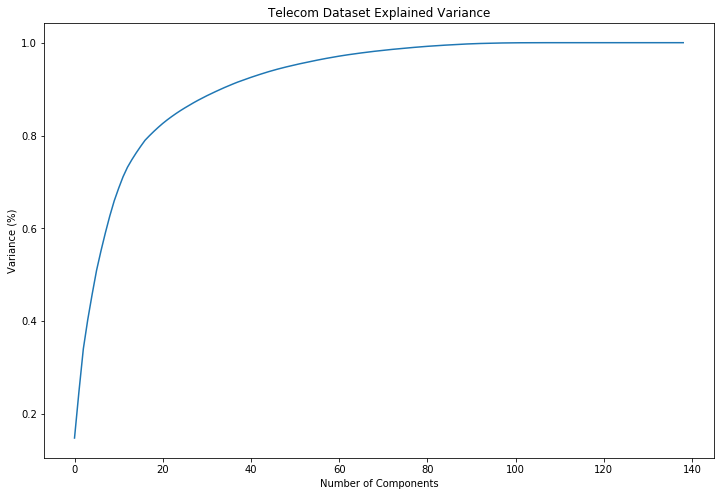

In [99]:
pca = PCA().fit(X_train_New_1)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Telecom Dataset Explained Variance')
plt.show()

In [100]:
from sklearn.decomposition import IncrementalPCA
pca_model = IncrementalPCA(n_components=100)

In [101]:
X_train_pca = pca_model.fit_transform(X_train_New_1)
X_test_pca = pca_model.transform(X_test_New_1)

In [102]:
X_train_New_1 = pca_model.fit_transform(X_train_New_1)
X_test_New_1 = pca_model.transform(X_test_New_1)

In [103]:
X_train_New_1 = pd.DataFrame(X_train_New_1)
X_test_New_1 = pd.DataFrame(X_test_New_1)

### I. SVM (Support Vector Machine) Model :

In [104]:
svc = svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced',probability=True)
svc.fit(X_train_New_1,y_train_New)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [105]:
y_pred_New = svc.predict(X_test_New_1)

In [106]:
print(classification_report(y_test_New,y_pred_New))

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       441
         1.0       0.83      0.78      0.80       436

    accuracy                           0.81       877
   macro avg       0.81      0.81      0.81       877
weighted avg       0.81      0.81      0.81       877



### II. RandomForest Classification :

In [107]:
rf = RandomForestClassifier(n_jobs=-1,class_weight = 'balanced',random_state=0) # Handling Imbalance in Target variable.
param_grid = {'max_depth':[2,3,4],
              'n_estimators':[50,80,100],
             'max_features':[0.3,0.4,0.5]} 
grid_search = GridSearchCV(estimator = rf,param_grid=param_grid,cv = 5,scoring = 'recall', n_jobs=-1,verbose=1)
grid_search.fit(X_train_New_1,y_train_New)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             ii

In [108]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7441154144058065
{'max_depth': 4, 'max_features': 0.5, 'n_estimators': 100}


In [109]:
rf = RandomForestClassifier(max_depth=4,max_features=0.5,n_estimators=100,class_weight='balanced',n_jobs=-1,random_state=0)
rf.fit(X_train_New_1,y_train_New)
y_pred_New = rf.predict(X_test_New_1)

In [110]:
print(classification_report(y_test_New,y_pred_New))

              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76       441
         1.0       0.76      0.73      0.75       436

    accuracy                           0.75       877
   macro avg       0.75      0.75      0.75       877
weighted avg       0.75      0.75      0.75       877



### III. Bagging :

In [111]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
param_grid = {'n_estimators':[800,900],
              'max_samples':[0.5,0.6],
             'max_features':[0.3,0.4]}
bagging = BaggingClassifier(KNeighborsClassifier()) 
grid_search = GridSearchCV(estimator = bagging,param_grid=param_grid,cv = 4,scoring = 'recall', n_jobs=-1,verbose=1)
grid_search.fit(X_train_New_1,y_train_New)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  6.6min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                                             leaf_size=30,
                                                                             metric='minkowski',
                                                                             metric_params=None,
                                                                             n_jobs=None,
                                                                             n_neighbors=5,
                                                                             p=2,
                                                                             weights='uniform'),
                                         bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
       

In [114]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8299117336887544
{'max_features': 0.3, 'max_samples': 0.5, 'n_estimators': 900}


In [115]:
bagging = BaggingClassifier(KNeighborsClassifier(),n_estimators=800,max_samples=0.6,max_features=0.3)
bagging.fit(X_train_New_1,y_train_New)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.3,
                  max_samples=0.6, n_estimators=800, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [116]:
y_pred_New = bagging.predict(X_test_New_1)

In [117]:
print(classification_report(y_test_New,y_pred_New))

              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       441
         1.0       0.75      0.79      0.77       436

    accuracy                           0.76       877
   macro avg       0.76      0.76      0.76       877
weighted avg       0.76      0.76      0.76       877



### IV. Boosting :

### 1) AdaBoosting :

In [118]:
# Adaboosting :
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

### AdaBoost - Hyperparameter Tuning ;

In [119]:
# parameter grid
param_grid = {"learning_rate": [0.2,0.4,0.6],
              "base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [120]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [121]:
# run grid search
folds = 4
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)
# fit 
grid_search_ABC.fit(X_train_New_1, y_train_New)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 62.4min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                mi

In [122]:
print(grid_search_ABC.best_score_)
print(grid_search_ABC.best_params_)

0.8638395211390266
{'base_estimator__max_depth': 5, 'learning_rate': 0.4, 'n_estimators': 600}


The results above show that:
- The ensemble with max_depth=5 is clearly overfitting (training auc is almost 1, while the test score is much lower)
- At max_depth=3, the model performs slightly better (approx 95% AUC) with a higher test score 

Thus, we should go ahead with ```max_depth=3``` and ```n_estimators=200```.

Note that we haven't experimented with many other important hyperparameters till now, such as ```learning rate```, ```subsample``` etc., and the results might be considerably improved by tuning them. We'll next experiment with these hyperparameters.

In [123]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=3)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=200,
    algorithm="SAMME")
# fit
ABC.fit(X_train_New_1, y_train_New)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [124]:
# predict on test data
predictions = ABC.predict_proba(X_test_New_1)
predictions[:10]

array([[0.51515813, 0.48484187],
       [0.486441  , 0.513559  ],
       [0.50628475, 0.49371525],
       [0.49373302, 0.50626698],
       [0.50497823, 0.49502177],
       [0.4874792 , 0.5125208 ],
       [0.51103989, 0.48896011],
       [0.51434971, 0.48565029],
       [0.50263497, 0.49736503],
       [0.522268  , 0.477732  ]])

In [128]:
# roc auc
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test_New, predictions[:, 1])

0.8578345711373235

In [129]:
y_pred_New = ABC.predict(X_test_New_1)

In [130]:
print(classification_report(y_test_New,y_pred_New))

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       441
         1.0       0.81      0.76      0.78       436

    accuracy                           0.79       877
   macro avg       0.79      0.79      0.79       877
weighted avg       0.79      0.79      0.79       877



### 2) XGBoosting :

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
# parameter grid
param_grid = {"learning_rate": [0.2,0.6,0.9],
              "subsample": [0.3,0.6,0.9]
             }

In [137]:
# adaboost with the tree as base estimator

GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [138]:
# run grid search
folds = 4
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  4.5min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=2,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=200,
                                                  n_iter_no_change=None,
                                                  presort=

In [139]:
print(grid_search_GBC.best_score_)
print(grid_search_GBC.best_params_)

0.9203880581808194
{'learning_rate': 0.2, 'subsample': 0.9}


In [143]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [144]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_New_1, y_train_New)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [145]:
# predict on test data
predictions = model.predict_proba(X_test_New_1)
predictions[:10]

array([[0.8807242 , 0.1192758 ],
       [0.11188495, 0.88811505],
       [0.6849873 , 0.31501272],
       [0.36202377, 0.6379762 ],
       [0.70706034, 0.29293963],
       [0.10473645, 0.89526355],
       [0.83556074, 0.16443926],
       [0.823289  , 0.17671104],
       [0.66858363, 0.33141637],
       [0.88416594, 0.11583404]], dtype=float32)

In [146]:
# roc auc
metrics.roc_auc_score(y_test_New, predictions[:, 1])

0.8772753749817971

In [147]:
# predict
y_pred_New = model.predict(X_test_New_1)
y_pred_New[:10]

array([0., 1., 0., 1., 0., 1., 0., 0., 0., 0.])

In [148]:
print(classification_report(y_test_New,y_pred_New))

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       441
         1.0       0.83      0.77      0.80       436

    accuracy                           0.81       877
   macro avg       0.81      0.81      0.81       877
weighted avg       0.81      0.81      0.81       877



### Now,we've achieved some scores of accuracy,recall and precision from the above models.So,we'll have to combine these models for getting optimal performance.Or else,we've to choose the models based on the aim or purpose in hand.
### Right now,one important aim is to identify the most important parameters/features responsible for predicting the churn of customers.Hence,for achieving this,we'll choose 'Logistic Regression' and 'Decision Tree'.And also,since the datasets we're working on right now have been converted into their principal components,we've to consider the original dataset for carrying out this operation :

### V. Logistic Regression :

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [151]:
print(X_train.shape)
print(X_test.shape)

(21365, 137)
(7122, 137)


### In order to get the most important features,I'm using only the top 30 columns/features using RFE :

In [152]:
logreg = LogisticRegression()
rfe = RFE(logreg, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

In [153]:
col = X_train.columns[rfe.support_]
X_train_New_3 = X_train[col]
X_train_New_3.shape

(21365, 30)

In [154]:
X_train_New_3.head()

,onnet_mou_8,offnet_mou_8,roam_ic_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_mou_6,...,spl_ic_mou_8,total_rech_num_7,total_rech_num_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aug_vbc_3g
26102,0.008644,0.006517,0.000000,0.000000,0.000000,0.011423,0.011031,0.004197,0.002252,0.002402,...,0.0,0.021898,0.010256,0.029220,0.000000,0.032206,0.0,0.000000,0.0625,0.000000
21300,0.004767,0.000745,0.000000,0.000000,0.000000,0.000180,0.000059,0.005934,0.000330,0.123116,...,0.0,0.233577,0.000000,0.006069,0.000000,0.000000,0.0,0.000000,0.0000,0.000000
3309,0.000871,0.003688,0.000000,0.000000,0.000000,0.009921,0.003734,0.000472,0.001323,0.015437,...,0.0,0.087591,0.010256,0.006743,0.000000,0.000000,0.0,0.000000,0.0000,0.000000
7489,0.042081,0.079665,0.000985,0.019840,0.010283,0.027006,0.044188,0.007135,0.069327,0.075366,...,0.0,0.065693,0.041026,0.029220,0.001040,0.015140,0.0,0.045455,0.0000,0.001949
8288,0.041467,0.033846,0.000000,0.000516,0.001823,0.008515,0.002808,0.050127,0.031633,0.114810,...,0.0,0.036496,0.061538,0.000000,0.053432,0.000000,0.0,0.159091,0.0000,0.000000


### Hence,one thing is clear from here that all the features of month 6 have lost relevance here,for the prediction of churn in the top 30 variables.hence,now we'll go ahead with the remaining features of months 7 and 8,and try to predict the churn.

### So,I'll check the correlations amongst these top 30 variables,and try to manually eliminate some of them,if possible.

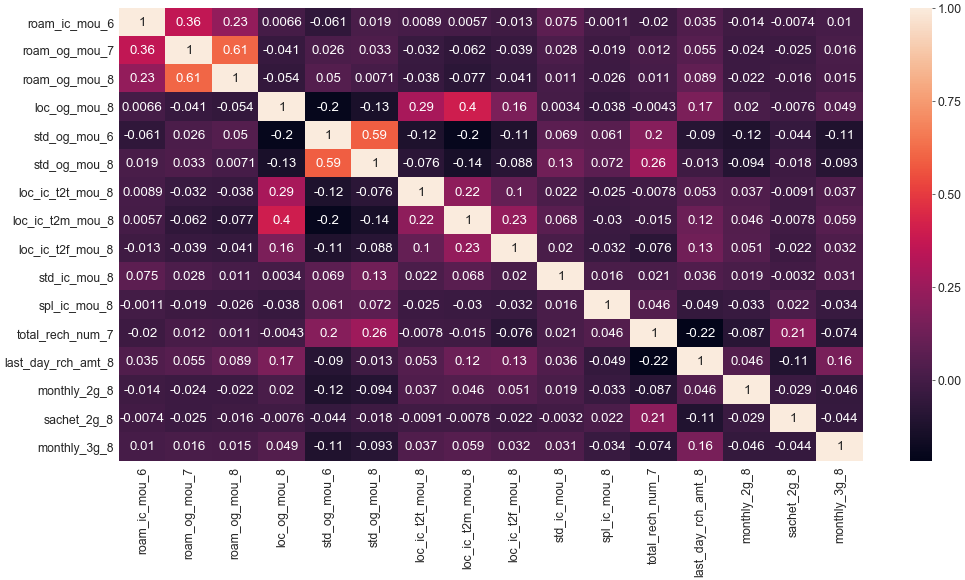

In [199]:
plt.figure(figsize=(30,15),dpi=40)
sns.set(font_scale=2)
sns.heatmap(X_train_New_3.corr(),annot = True)
plt.show()

In [156]:
col = col.drop(['onnet_mou_8','offnet_mou_8','aug_vbc_3g','total_og_mou_8','total_ic_mou_7','total_ic_mou_8'])

In [157]:
len(col)

24

In [158]:
X_train_New_3 = X_train[col]

In [159]:
import statsmodels.api as sm

In [160]:
X_train_sm = sm.add_constant(X_train_New_3)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21365
Model:                            GLM   Df Residuals:                    21340
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3688.8
Date:                Mon, 04 Nov 2019   Deviance:                       7377.6
Time:                        14:59:15   Pearson chi2:                 3.71e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1363      0.074    -15.432      0.000      -1.281      -0.992
roam_ic_mou_6          2.5344      0.776      3.268      0.001       1.014       4.054
roam_og_mou_7          3.4439      0.793      4.344      0.000       1.890       4.998
roam_og_mou_8          4.6431      1.342      3.459      0.001       2.012       7.274
loc_og_t2m_mou_8      -1.3726      2.453     -0.560      0.576      -6.180       3.434
loc_og_mou_8         -15.9596      5.153     -3.097      0.002     -26.060      -5.859
std_og_t2t_mou_8      19.1528     40.106      0.478      0.633     -59.454      97.759
std_og_t2m_mou_8      31.0403     69.852      0.444      0.657    -105.867     167.948
std_og_mou_6           2.6809      0.516      5.194      0.000       1.669       3.692
std_og_mou_7           3.0141      0.664      4.537      0.000       1.712       4.316
std_og_mou_8         -46.7475     69.981     -0.668      0.504    -183.907      90.412
loc_ic_t2t_mou_8    2.013e+05   2.26e+04      8.902      0.000    1.57e+05    2.46e+05
loc_ic_t2m_mou_8    2.885e+05   3.24e+04      8.902      0.000    2.25e+05    3.52e+05
loc_ic_t2f_mou_8    7.987e+04   8972.974      8.901      0.000    6.23e+04    9.75e+04
loc_ic_mou_8       -2.891e+05   3.25e+04     -8.903      0.000   -3.53e+05   -2.25e+05
std_ic_mou_8          -9.1482      2.604     -3.513      0.000     -14.252      -4.044
spl_ic_mou_8         -14.9446      2.994     -4.992      0.000     -20.812      -9.077
total_rech_num_7       4.3723      0.610      7.167      0.000       3.177       5.568
total_rech_num_8     -10.8914      1.372     -7.938      0.000     -13.581      -8.202
last_day_rch_amt_8   -16.0431      2.194     -7.312      0.000     -20.343     -11.743
vol_2g_mb_8           -5.6492      3.082     -1.833      0.067     -11.689       0.391
vol_3g_mb_8           -5.4663      3.578     -1.528      0.127     -12.480       1.547
monthly_2g_8          -5.9135      1.097     -5.392      0.000      -8.063      -3.764
sachet_2g_8           -4.2744      1.380     -3.098      0.002      -6.979      -1.570
monthly_3g_8          -8.9505      2.733     -3.275      0.001     -14.307      -3.594
======================================================================================
"""

In [161]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [162]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_New_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_New_3.values, i) for i in range(X_train_New_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,loc_ic_mou_8,2.898023e+09
11,loc_ic_t2m_mou_8,1.421550e+09
10,loc_ic_t2t_mou_8,5.046486e+08
12,loc_ic_t2f_mou_8,4.387908e+07
9,std_og_mou_8,3.861410e+03
6,std_og_t2m_mou_8,1.554790e+03
5,std_og_t2t_mou_8,1.520780e+03
17,total_rech_num_8,6.540000e+00
8,std_og_mou_7,6.520000e+00
16,total_rech_num_7,6.200000e+00


In [163]:
# Now,firstly,I'll remove columns with high p-value and high VIF :
X_train_New_3 = X_train_New_3.drop(['std_og_t2m_mou_8'],axis=1) 

In [164]:
X_train_sm = sm.add_constant(X_train_New_3)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21365
Model:                            GLM   Df Residuals:                    21341
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3688.9
Date:                Mon, 04 Nov 2019   Deviance:                       7377.8
Time:                        14:59:28   Pearson chi2:                 3.67e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1373      0.074    -15.455      0.000      -1.282      -0.993
roam_ic_mou_6          2.5349      0.776      3.268      0.001       1.015       4.055
roam_og_mou_7          3.4453      0.793      4.346      0.000       1.891       4.999
roam_og_mou_8          4.6395      1.342      3.456      0.001       2.009       7.270
loc_og_t2m_mou_8      -1.3905      2.455     -0.566      0.571      -6.203       3.422
loc_og_mou_8         -15.9896      5.160     -3.099      0.002     -26.102      -5.877
std_og_t2t_mou_8       1.3434      1.322      1.016      0.309      -1.247       3.934
std_og_mou_6           2.6846      0.516      5.201      0.000       1.673       3.696
std_og_mou_7           3.0167      0.664      4.541      0.000       1.715       4.319
std_og_mou_8         -15.6685      2.131     -7.354      0.000     -19.844     -11.493
loc_ic_t2t_mou_8    2.015e+05   2.26e+04      8.911      0.000    1.57e+05    2.46e+05
loc_ic_t2m_mou_8    2.888e+05   3.24e+04      8.910      0.000    2.25e+05    3.52e+05
loc_ic_t2f_mou_8    7.994e+04   8972.245      8.909      0.000    6.24e+04    9.75e+04
loc_ic_mou_8       -2.893e+05   3.25e+04     -8.911      0.000   -3.53e+05   -2.26e+05
std_ic_mou_8          -9.2649      2.599     -3.565      0.000     -14.359      -4.171
spl_ic_mou_8         -14.9309      2.993     -4.988      0.000     -20.798      -9.064
total_rech_num_7       4.3783      0.610      7.177      0.000       3.183       5.574
total_rech_num_8     -10.8822      1.372     -7.932      0.000     -13.571      -8.193
last_day_rch_amt_8   -16.0762      2.192     -7.335      0.000     -20.372     -11.781
vol_2g_mb_8           -5.6414      3.082     -1.831      0.067     -11.682       0.399
vol_3g_mb_8           -5.4548      3.576     -1.525      0.127     -12.463       1.554
monthly_2g_8          -5.9182      1.097     -5.397      0.000      -8.068      -3.769
sachet_2g_8           -4.2745      1.380     -3.098      0.002      -6.979      -1.570
monthly_3g_8          -8.9635      2.732     -3.280      0.001     -14.319      -3.608
======================================================================================
"""

In [165]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_New_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_New_3.values, i) for i in range(X_train_New_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,loc_ic_mou_8,2.889972e+09
10,loc_ic_t2m_mou_8,1.417602e+09
9,loc_ic_t2t_mou_8,5.032468e+08
11,loc_ic_t2f_mou_8,4.375722e+07
16,total_rech_num_8,6.540000e+00
7,std_og_mou_7,6.520000e+00
15,total_rech_num_7,6.200000e+00
8,std_og_mou_8,5.920000e+00
3,loc_og_t2m_mou_8,4.450000e+00
4,loc_og_mou_8,4.130000e+00


In [166]:
X_train_New_3 = X_train_New_3.drop(['loc_og_t2m_mou_8'],axis=1)

In [167]:
X_train_sm = sm.add_constant(X_train_New_3)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21365
Model:                            GLM   Df Residuals:                    21342
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3689.1
Date:                Mon, 04 Nov 2019   Deviance:                       7378.1
Time:                        14:59:40   Pearson chi2:                 3.68e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1378      0.074    -15.460      0.000      -1.282      -0.994
roam_ic_mou_6          2.5406      0.776      3.274      0.001       1.020       4.061
roam_og_mou_7          3.4458      0.792      4.348      0.000       1.893       4.999
roam_og_mou_8          4.6520      1.342      3.467      0.001       2.022       7.282
loc_og_mou_8         -18.4443      3.027     -6.092      0.000     -24.378     -12.511
std_og_t2t_mou_8       1.3597      1.321      1.029      0.303      -1.230       3.949
std_og_mou_6           2.6878      0.516      5.207      0.000       1.676       3.700
std_og_mou_7           3.0190      0.664      4.544      0.000       1.717       4.321
std_og_mou_8         -15.6749      2.131     -7.357      0.000     -19.851     -11.499
loc_ic_t2t_mou_8    2.014e+05   2.26e+04      8.908      0.000    1.57e+05    2.46e+05
loc_ic_t2m_mou_8    2.887e+05   3.24e+04      8.908      0.000    2.25e+05    3.52e+05
loc_ic_t2f_mou_8    7.992e+04   8972.556      8.907      0.000    6.23e+04    9.75e+04
loc_ic_mou_8       -2.893e+05   3.25e+04     -8.909      0.000   -3.53e+05   -2.26e+05
std_ic_mou_8          -9.2540      2.598     -3.561      0.000     -14.347      -4.161
spl_ic_mou_8         -14.9324      2.994     -4.988      0.000     -20.800      -9.065
total_rech_num_7       4.3767      0.610      7.171      0.000       3.181       5.573
total_rech_num_8     -10.8939      1.372     -7.940      0.000     -13.583      -8.205
last_day_rch_amt_8   -16.1191      2.191     -7.356      0.000     -20.414     -11.824
vol_2g_mb_8           -5.6306      3.081     -1.827      0.068     -11.670       0.408
vol_3g_mb_8           -5.4424      3.574     -1.523      0.128     -12.447       1.562
monthly_2g_8          -5.9205      1.097     -5.399      0.000      -8.070      -3.771
sachet_2g_8           -4.2776      1.380     -3.100      0.002      -6.982      -1.573
monthly_3g_8          -8.9605      2.732     -3.280      0.001     -14.314      -3.607
======================================================================================
"""

In [168]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_New_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_New_3.values, i) for i in range(X_train_New_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,loc_ic_mou_8,2.877334e+09
9,loc_ic_t2m_mou_8,1.411405e+09
8,loc_ic_t2t_mou_8,5.010455e+08
10,loc_ic_t2f_mou_8,4.356586e+07
6,std_og_mou_7,6.520000e+00
15,total_rech_num_8,6.510000e+00
14,total_rech_num_7,6.200000e+00
7,std_og_mou_8,5.920000e+00
5,std_og_mou_6,3.180000e+00
4,std_og_t2t_mou_8,2.680000e+00


In [169]:
X_train_New_3 = X_train_New_3.drop(['std_og_t2t_mou_8'],axis=1)

In [170]:
X_train_sm = sm.add_constant(X_train_New_3)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21365
Model:                            GLM   Df Residuals:                    21343
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3689.6
Date:                Mon, 04 Nov 2019   Deviance:                       7379.2
Time:                        14:59:48   Pearson chi2:                 4.53e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1369      0.074    -15.451      0.000      -1.281      -0.993
roam_ic_mou_6          2.5385      0.776      3.272      0.001       1.018       4.059
roam_og_mou_7          3.4421      0.792      4.345      0.000       1.890       4.995
roam_og_mou_8          4.6642      1.340      3.482      0.000       2.039       7.290
loc_og_mou_8         -18.5259      3.029     -6.116      0.000     -24.463     -12.589
std_og_mou_6           2.6825      0.516      5.197      0.000       1.671       3.694
std_og_mou_7           3.0044      0.664      4.522      0.000       1.702       4.307
std_og_mou_8         -14.2810      1.608     -8.880      0.000     -17.433     -11.129
loc_ic_t2t_mou_8    2.015e+05   2.26e+04      8.911      0.000    1.57e+05    2.46e+05
loc_ic_t2m_mou_8    2.888e+05   3.24e+04      8.911      0.000    2.25e+05    3.52e+05
loc_ic_t2f_mou_8    7.993e+04   8971.578      8.910      0.000    6.23e+04    9.75e+04
loc_ic_mou_8       -2.893e+05   3.25e+04     -8.911      0.000   -3.53e+05   -2.26e+05
std_ic_mou_8          -9.3686      2.602     -3.600      0.000     -14.469      -4.269
spl_ic_mou_8         -15.1381      2.990     -5.062      0.000     -20.999      -9.277
total_rech_num_7       4.3795      0.610      7.177      0.000       3.183       5.575
total_rech_num_8     -10.9268      1.372     -7.966      0.000     -13.615      -8.238
last_day_rch_amt_8   -16.0918      2.189     -7.350      0.000     -20.383     -11.801
vol_2g_mb_8           -5.6248      3.079     -1.827      0.068     -11.659       0.409
vol_3g_mb_8           -5.4188      3.577     -1.515      0.130     -12.429       1.591
monthly_2g_8          -5.9306      1.096     -5.409      0.000      -8.080      -3.782
sachet_2g_8           -4.2813      1.380     -3.101      0.002      -6.987      -1.576
monthly_3g_8          -8.9920      2.732     -3.291      0.001     -14.347      -3.637
======================================================================================
"""

In [171]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_New_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_New_3.values, i) for i in range(X_train_New_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,loc_ic_mou_8,2.877095e+09
8,loc_ic_t2m_mou_8,1.411287e+09
7,loc_ic_t2t_mou_8,5.010037e+08
9,loc_ic_t2f_mou_8,4.356223e+07
14,total_rech_num_8,6.510000e+00
5,std_og_mou_7,6.510000e+00
13,total_rech_num_7,6.200000e+00
6,std_og_mou_8,4.500000e+00
4,std_og_mou_6,3.180000e+00
17,vol_3g_mb_8,2.250000e+00


### Now,despite removing high p-value features constantly for 3-4 times,'loc_ic_mou_8' still has a very high VIF.Hence,we'll check if removing this variable has an effect on the overall model : 

In [172]:
X_train_New_3 = X_train_New_3.drop(['loc_ic_mou_8'],axis=1)

In [173]:
X_train_sm = sm.add_constant(X_train_New_3)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21365
Model:                            GLM   Df Residuals:                    21344
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3730.6
Date:                Mon, 04 Nov 2019   Deviance:                       7461.3
Time:                        14:59:57   Pearson chi2:                 1.01e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3502      0.071    -19.106      0.000      -1.489      -1.212
roam_ic_mou_6          2.6114      0.774      3.374      0.001       1.094       4.129
roam_og_mou_7          3.8488      0.783      4.917      0.000       2.315       5.383
roam_og_mou_8          5.0766      1.325      3.830      0.000       2.479       7.674
loc_og_mou_8         -21.0261      3.165     -6.642      0.000     -27.230     -14.822
std_og_mou_6           3.0506      0.513      5.943      0.000       2.045       4.057
std_og_mou_7           3.0914      0.662      4.673      0.000       1.795       4.388
std_og_mou_8         -15.7532      1.625     -9.696      0.000     -18.938     -12.569
loc_ic_t2t_mou_8      -6.7764      2.814     -2.408      0.016     -12.292      -1.261
loc_ic_t2m_mou_8     -20.6508      3.169     -6.516      0.000     -26.862     -14.439
loc_ic_t2f_mou_8     -17.1466      4.706     -3.644      0.000     -26.370      -7.924
std_ic_mou_8         -10.8911      2.745     -3.968      0.000     -16.270      -5.512
spl_ic_mou_8         -15.7048      2.997     -5.240      0.000     -21.578      -9.831
total_rech_num_7       4.3357      0.607      7.139      0.000       3.145       5.526
total_rech_num_8     -11.1622      1.374     -8.121      0.000     -13.856      -8.468
last_day_rch_amt_8   -17.1175      2.200     -7.780      0.000     -21.430     -12.805
vol_2g_mb_8           -5.7381      3.110     -1.845      0.065     -11.834       0.357
vol_3g_mb_8           -5.5616      3.607     -1.542      0.123     -12.632       1.508
monthly_2g_8          -6.1017      1.097     -5.564      0.000      -8.251      -3.953
sachet_2g_8           -4.5188      1.382     -3.269      0.001      -7.228      -1.809
monthly_3g_8          -9.3179      2.728     -3.416      0.001     -14.665      -3.971
======================================================================================
"""

In [174]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_New_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_New_3.values, i) for i in range(X_train_New_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,std_og_mou_7,6.50
13,total_rech_num_8,6.50
12,total_rech_num_7,6.06
6,std_og_mou_8,4.49
4,std_og_mou_6,3.16
16,vol_3g_mb_8,2.25
19,monthly_3g_8,2.16
3,loc_og_mou_8,2.00
8,loc_ic_t2m_mou_8,1.88
1,roam_og_mou_7,1.88


In [175]:
X_train_New_3 = X_train_New_3.drop(['vol_3g_mb_8'],axis=1)

In [176]:
X_train_sm = sm.add_constant(X_train_New_3)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21365
Model:                            GLM   Df Residuals:                    21345
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3732.0
Date:                Mon, 04 Nov 2019   Deviance:                       7464.0
Time:                        15:00:03   Pearson chi2:                 1.03e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3525      0.071    -19.156      0.000      -1.491      -1.214
roam_ic_mou_6          2.6148      0.774      3.380      0.001       1.099       4.131
roam_og_mou_7          3.8392      0.782      4.910      0.000       2.307       5.372
roam_og_mou_8          5.0991      1.323      3.853      0.000       2.506       7.693
loc_og_mou_8         -20.8692      3.159     -6.606      0.000     -27.061     -14.677
std_og_mou_6           3.0623      0.513      5.967      0.000       2.056       4.068
std_og_mou_7           3.1107      0.662      4.702      0.000       1.814       4.407
std_og_mou_8         -15.6917      1.622     -9.673      0.000     -18.871     -12.512
loc_ic_t2t_mou_8      -6.7649      2.811     -2.407      0.016     -12.274      -1.256
loc_ic_t2m_mou_8     -20.6486      3.168     -6.518      0.000     -26.857     -14.440
loc_ic_t2f_mou_8     -17.2227      4.705     -3.660      0.000     -26.445      -8.001
std_ic_mou_8         -10.8519      2.741     -3.959      0.000     -16.225      -5.479
spl_ic_mou_8         -15.7091      2.997     -5.241      0.000     -21.584      -9.834
total_rech_num_7       4.3302      0.607      7.132      0.000       3.140       5.520
total_rech_num_8     -11.2653      1.372     -8.213      0.000     -13.954      -8.577
last_day_rch_amt_8   -17.2498      2.198     -7.848      0.000     -21.558     -12.942
vol_2g_mb_8           -5.1882      3.069     -1.690      0.091     -11.204       0.828
monthly_2g_8          -6.6061      1.046     -6.314      0.000      -8.657      -4.555
sachet_2g_8           -4.9160      1.360     -3.614      0.000      -7.582      -2.250
monthly_3g_8         -12.1450      2.118     -5.735      0.000     -16.296      -7.994
======================================================================================
"""

In [177]:
X_train_New_3 = X_train_New_3.drop(['vol_2g_mb_8'],axis=1)

In [178]:
X_train_sm = sm.add_constant(X_train_New_3)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21365
Model:                            GLM   Df Residuals:                    21346
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3733.7
Date:                Mon, 04 Nov 2019   Deviance:                       7467.4
Time:                        15:00:06   Pearson chi2:                 1.10e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3564      0.071    -19.224      0.000      -1.495      -1.218
roam_ic_mou_6          2.5954      0.774      3.355      0.001       1.079       4.111
roam_og_mou_7          3.8716      0.780      4.966      0.000       2.343       5.400
roam_og_mou_8          5.0357      1.319      3.818      0.000       2.450       7.621
loc_og_mou_8         -20.6419      3.149     -6.554      0.000     -26.814     -14.469
std_og_mou_6           3.0732      0.513      5.996      0.000       2.069       4.078
std_og_mou_7           3.1278      0.661      4.729      0.000       1.832       4.424
std_og_mou_8         -15.6607      1.620     -9.664      0.000     -18.837     -12.485
loc_ic_t2t_mou_8      -6.7855      2.809     -2.416      0.016     -12.291      -1.281
loc_ic_t2m_mou_8     -20.6304      3.165     -6.518      0.000     -26.834     -14.427
loc_ic_t2f_mou_8     -17.1914      4.704     -3.655      0.000     -26.410      -7.973
std_ic_mou_8         -10.8312      2.739     -3.954      0.000     -16.200      -5.463
spl_ic_mou_8         -15.7766      3.002     -5.255      0.000     -21.661      -9.892
total_rech_num_7       4.3222      0.607      7.124      0.000       3.133       5.511
total_rech_num_8     -11.3090      1.371     -8.250      0.000     -13.996      -8.622
last_day_rch_amt_8   -17.3191      2.201     -7.867      0.000     -21.634     -13.004
monthly_2g_8          -7.2459      0.998     -7.257      0.000      -9.203      -5.289
sachet_2g_8           -5.6821      1.308     -4.343      0.000      -8.246      -3.118
monthly_3g_8         -12.7544      2.106     -6.055      0.000     -16.883      -8.626
======================================================================================
"""

In [179]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_New_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_New_3.values, i) for i in range(X_train_New_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,std_og_mou_7,6.50
13,total_rech_num_8,6.49
12,total_rech_num_7,6.05
6,std_og_mou_8,4.49
4,std_og_mou_6,3.16
3,loc_og_mou_8,1.99
8,loc_ic_t2m_mou_8,1.88
1,roam_og_mou_7,1.88
2,roam_og_mou_8,1.73
14,last_day_rch_amt_8,1.51


In [180]:
X_train_New_3 = X_train_New_3.drop(['std_og_mou_7'],axis=1)

In [181]:
X_train_sm = sm.add_constant(X_train_New_3)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21365
Model:                            GLM   Df Residuals:                    21347
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3744.8
Date:                Mon, 04 Nov 2019   Deviance:                       7489.6
Time:                        15:00:11   Pearson chi2:                 1.81e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3396      0.070    -19.011      0.000      -1.478      -1.201
roam_ic_mou_6          2.7404      0.775      3.534      0.000       1.221       4.260
roam_og_mou_7          3.1393      0.761      4.124      0.000       1.647       4.631
roam_og_mou_8          6.4051      1.269      5.046      0.000       3.917       8.893
loc_og_mou_8         -20.9247      3.169     -6.604      0.000     -27.135     -14.714
std_og_mou_6           4.3246      0.437      9.900      0.000       3.468       5.181
std_og_mou_8         -11.5738      1.337     -8.657      0.000     -14.194      -8.953
loc_ic_t2t_mou_8      -6.9874      2.827     -2.471      0.013     -12.529      -1.446
loc_ic_t2m_mou_8     -20.8262      3.169     -6.571      0.000     -27.038     -14.615
loc_ic_t2f_mou_8     -17.5101      4.732     -3.701      0.000     -26.784      -8.236
std_ic_mou_8         -10.8522      2.733     -3.971      0.000     -16.209      -5.496
spl_ic_mou_8         -16.1739      3.010     -5.374      0.000     -22.073     -10.275
total_rech_num_7       5.4715      0.559      9.796      0.000       4.377       6.566
total_rech_num_8     -13.1993      1.322     -9.981      0.000     -15.791     -10.607
last_day_rch_amt_8   -17.8044      2.205     -8.076      0.000     -22.125     -13.483
monthly_2g_8          -7.2312      0.999     -7.240      0.000      -9.189      -5.274
sachet_2g_8           -5.7201      1.310     -4.366      0.000      -8.288      -3.152
monthly_3g_8         -12.8370      2.110     -6.084      0.000     -16.973      -8.701
======================================================================================
"""

In [182]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_New_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_New_3.values, i) for i in range(X_train_New_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,total_rech_num_8,5.98
11,total_rech_num_7,5.18
5,std_og_mou_8,2.53
4,std_og_mou_6,2.19
3,loc_og_mou_8,1.99
7,loc_ic_t2m_mou_8,1.88
1,roam_og_mou_7,1.81
2,roam_og_mou_8,1.69
13,last_day_rch_amt_8,1.51
6,loc_ic_t2t_mou_8,1.32


In [183]:
X_train_New_3 = X_train_New_3.drop(['total_rech_num_8'],axis=1)

In [184]:
X_train_sm = sm.add_constant(X_train_New_3)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21365
Model:                            GLM   Df Residuals:                    21348
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3803.1
Date:                Mon, 04 Nov 2019   Deviance:                       7606.1
Time:                        15:00:20   Pearson chi2:                 8.70e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3599      0.070    -19.513      0.000      -1.496      -1.223
roam_ic_mou_6          2.7682      0.782      3.538      0.000       1.235       4.302
roam_og_mou_7          3.3791      0.771      4.383      0.000       1.868       4.890
roam_og_mou_8          3.9294      1.255      3.131      0.002       1.469       6.389
loc_og_mou_8         -25.1030      3.198     -7.849      0.000     -31.371     -18.835
std_og_mou_6           5.0291      0.435     11.572      0.000       4.177       5.881
std_og_mou_8         -18.3960      1.258    -14.617      0.000     -20.863     -15.929
loc_ic_t2t_mou_8      -7.2431      2.836     -2.554      0.011     -12.803      -1.684
loc_ic_t2m_mou_8     -23.4704      3.220     -7.289      0.000     -29.782     -17.159
loc_ic_t2f_mou_8     -15.9539      4.644     -3.435      0.001     -25.056      -6.851
std_ic_mou_8         -11.5056      2.828     -4.068      0.000     -17.049      -5.962
spl_ic_mou_8         -17.9880      3.033     -5.932      0.000     -23.932     -12.044
total_rech_num_7       1.7359      0.426      4.079      0.000       0.902       2.570
last_day_rch_amt_8   -15.2722      2.181     -7.003      0.000     -19.547     -10.998
monthly_2g_8          -7.5053      0.999     -7.512      0.000      -9.464      -5.547
sachet_2g_8           -8.2578      1.263     -6.541      0.000     -10.732      -5.783
monthly_3g_8         -13.6626      2.090     -6.537      0.000     -17.759      -9.566
======================================================================================
"""

In [185]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_New_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_New_3.values, i) for i in range(X_train_New_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,std_og_mou_8,2.21
4,std_og_mou_6,2.15
11,total_rech_num_7,2.12
3,loc_og_mou_8,1.96
7,loc_ic_t2m_mou_8,1.87
1,roam_og_mou_7,1.81
2,roam_og_mou_8,1.68
12,last_day_rch_amt_8,1.49
6,loc_ic_t2t_mou_8,1.32
0,roam_ic_mou_6,1.22


### Now,we've achieved a model with a feature set with all features significant,and acceptable VIFs .So,and let's predict our model labels with these obtained features now :

In [186]:
X_train_New_3.shape

(21365, 16)

In [187]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [188]:
y_train_pred[:10]

array([0.02911494, 0.37575217, 0.19039475, 0.01250131, 0.02448574,
       0.01439925, 0.0245641 , 0.05408885, 0.04377667, 0.19596531])

In [189]:
y_train_pred_final = pd.DataFrame()
y_train_pred_final['y_train'] = y_train
y_train_pred_final['y_train_pred'] = y_train_pred

In [190]:
y_train_pred_final['y_train_pred'].sort_values(ascending=False).head()

16496    0.980064
22873    0.969467
8287     0.932773
1192     0.904503
3044     0.886552
Name: y_train_pred, dtype: float64

### Step 10: Finding Optimal Cutoff Point

In [191]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_train_pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,y_train,y_train_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
26102,0.0,0.029115,1,0,0,0,0,0,0,0,0,0
21300,0.0,0.375752,1,1,1,1,0,0,0,0,0,0
3309,0.0,0.190395,1,1,0,0,0,0,0,0,0,0
7489,0.0,0.012501,1,0,0,0,0,0,0,0,0,0
8288,0.0,0.024486,1,0,0,0,0,0,0,0,0,0


In [200]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','recall','precision'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.y_train, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    recall = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,recall,precision]
print(cutoff_df)

     prob  accuracy    recall  precision
0.0   0.0  0.061736  1.000000   0.061736
0.1   0.1  0.840206  0.720243   0.237797
0.2   0.2  0.924081  0.516300   0.409009
0.3   0.3  0.936672  0.285064   0.478372
0.4   0.4  0.938638  0.129644   0.511976
0.5   0.5  0.938170  0.050038   0.492537
0.6   0.6  0.938310  0.018954   0.510204
0.7   0.7  0.938544  0.012130   0.615385
0.8   0.8  0.938498  0.005307   0.777778
0.9   0.9  0.938357  0.002274   0.750000


### As seen from the above table,I've to choose a cut-off probability with maximum recall obtained of 0.72,i.e.0.1,(even though precision is as low as 0.24 here) because of following reasons :
- Predicting the churners is more important than predicting the non-churners accurately.
- Churners are an extremely small set amongst the entire dataset,and hence predicting most of the churners as churners (Recall),by keeping False Negatives as low as possible,is more important than predicting most of the non-churners as non-churners(Precision),by keeping the False Positives as low as possible.
- If there are higher number of False Positives,then the model will simply predict a higher number of non-churners as churners,and in the campaigning more efforts will be spent by the sales and marketing team on customers who are unnecessary believed to churn in the long run.But,at the same time keeping the False Negatives as low as possible will ensure that most customers likely to churn have been identified correctly.

### So now finally,we'll go ahead and fit the model with the test set by setting the threshold at 0.10 :

In [221]:
cols = X_train_New_3.columns

In [222]:
cols

Index(['roam_ic_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_8',
       'std_og_mou_6', 'std_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')

In [223]:
X_test_New_3 = X_test[cols]

In [224]:
X_test_sm = sm.add_constant(X_test_New_3)

In [225]:
y_test_pred = res.predict(X_test_sm)

In [226]:
y_test_pred[:10]

8746     0.035226
26654    0.027158
24908    0.017870
25419    0.038766
24644    0.285299
10183    0.002090
16467    0.000478
9655     0.150729
20397    0.011388
18299    0.024997
dtype: float64

In [227]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [228]:
y_pred_1.head()

,0
8746,0.035226
26654,0.027158
24908,0.017870
25419,0.038766
24644,0.285299


In [231]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
8746,1.0
26654,0.0
24908,0.0
25419,0.0
24644,0.0


In [232]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Churn,0
0,1.0,0.035226
1,0.0,0.027158
2,0.0,0.017870
3,0.0,0.038766
4,0.0,0.285299


In [233]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Pred'})
y_pred_final.head()

,Churn,Churn_Pred
0,1.0,0.035226
1,0.0,0.027158
2,0.0,0.017870
3,0.0,0.038766
4,0.0,0.285299


In [235]:
y_pred_final['Churn_Pred'] = y_pred_final['Churn_Pred'].map(lambda x : 1 if x > 0.10 else 0)
y_pred_final.head()

,Churn,Churn_Pred
0,1.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,1


In [237]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.Churn_Pred)

0.8389497332210053

In [238]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.Churn_Pred)
confusion2

array([[5668, 1020],
       [ 127,  307]], dtype=int64)

In [240]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [241]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7073732718894009

In [242]:
# Let us calculate specificity
TN / float(TN+FP)

0.847488038277512

In [243]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.15251196172248804


In [244]:
# positive predictive value 
print (TP / float(TP+FP))

0.23134890730972119


In [245]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9780845556514236


### Thus,the top 6 most important features(weightage-wise),obtained by manual elimination on Logistic Regression are :

- loc_og_mou_8
- loc_ic_t2m_mou_8
- spl_ic_mou_8
- loc_ic_t2f_mou_8
- last_day_rch_amt_8
- monthly_3g_8
- std_ic_mou_8

### Some other important features,obtained by manual elimination would be :

- sachet_2g_8
- monthly_2g_8
- loc_ic_t2t_mou_8
- std_og_mou_6
- roam_og_mou_8

## 10) Identifying important churn indicators and business recommendation :

### Important Churn Indicators :

### Thus,the top 7 most important features(weightage-wise),obtained by manual elimination on Logistic Regression are :

1) **loc_og_mou_8 :** Denotes number of local outgoing calls made within the 8th month by the customer within his own           Circle Id.

2) **loc_ic_t2m_mou_8 :** Denotes number of local incoming calls customer has received from a network different than this,in         the 8th month.

3) **spl_ic_mou_8 :** Denotes number of special incoming calls customer has received in the 8th month.

4) **loc_ic_t2f_mou_8 :** Represents local incoming calls customer has received from his fixed incoming lines in the 8th month.

5) **last_day_rch_amt_8 :** Denotes the amount of recharge done by the customer on his last recharge day in the 8th month. 

6) **monthly_3g_8 :** Denotes the number of times the customer recharged his 3G internet,in the 8th month.

7) **std_ic_mou_8 :** Shows the number of times customer received STD calls in the 8th month.

### Some other important features,obtained by manual elimination would be :

- **sachet_2g_8 :** Denotes number of times the customer has made use of the 2G internet saches in the 8th month.
- **monthly_2g_8 :** Denotes number of times the customer has recharged his monthly 2G internet in the 8th month.
- **loc_ic_t2t_mou_8 :** Denotes number of times the customer has received incoming calls from the same network as this in the 8th month.
- **std_og_mou_6 :** Denotes number of times the customer has made STD calls in the 6th month.
- **roam_og_mou_8 :** Denotes number of times the customer has made calls during his services were in roaming in the 8th month.

### The following is a representation of the dataframe with only the most optimal features obtained from above :

In [50]:
tel_data_NotMissing_optimal = tel_data_NotMissing[['loc_og_mou_8','loc_ic_t2m_mou_8','spl_ic_mou_8','loc_ic_t2f_mou_8','last_day_rch_amt_8','monthly_3g_8','std_ic_mou_8','sachet_2g_8','monthly_2g_8','loc_ic_t2t_mou_8','std_og_mou_6','roam_og_mou_8']]
tel_data_NotMissing_optimal.head(10)

,loc_og_mou_8,loc_ic_t2m_mou_8,spl_ic_mou_8,loc_ic_t2f_mou_8,last_day_rch_amt_8,monthly_3g_8,std_ic_mou_8,sachet_2g_8,monthly_2g_8,loc_ic_t2t_mou_8,std_og_mou_6,roam_og_mou_8
0,255.79,121.19,0.0,39.53,779,0,193.94,0,0,27.31,60.86,38.06
1,63.04,15.48,0.0,0.00,10,0,0.75,3,0,0.31,130.26,0.00
2,353.99,195.18,0.0,7.49,0,0,474.41,3,0,52.58,701.78,1.44
3,205.93,150.16,0.0,32.71,130,0,82.44,0,0,28.89,30.89,0.00
4,0.00,0.00,0.0,0.00,0,0,0.00,0,0,0.00,1148.46,13.34
5,129.74,129.16,0.0,10.39,50,0,101.93,0,0,19.54,763.29,0.00
6,95.34,50.69,0.0,89.19,130,0,60.33,0,0,7.63,278.24,22.93
7,0.00,37.93,0.0,0.16,455,1,1.04,0,0,2.45,0.00,0.00
8,28.44,28.06,0.0,0.00,130,0,19.01,0,0,1.36,274.21,0.00
9,203.21,10.74,0.0,0.00,110,0,0.00,0,0,49.89,34.68,0.00


### Business Recommendations :

The most important aspects the business has to look over are the ones which are derived from the top-most weighted features,as mentioned above. These are some of the ways the **'__Planning__'** team and **'__Sales & Marketing__'** team can approach the different actionable features,i.e.the features which can be directly impacted or taken action on :

1) **loc_og_mou_8 :** 
This feature has the highest correlation amongst all others with respect to the customer churn.The correlation is also negative.That means,as the number of calls made within local circle decreases,the customer has a higher chance of churning.
As any business scenario this is obvious that an average user of the network would make maximum calls within his own local circle.Now,since the 8th month is the '**action phase**' according to the problem statement,this is the month where the customer experience is most likely to sore.So,any deviations in customer behaviour in this 8th month has to be taken special care of.For e.g.,he can be given special discounts in the local outgoing calls,and also should be given special and immediate attention to in case of any complaint or query in the 8th month.The discounts should be based on his churn probability.

**2) loc_ic_t2m_mou_8 :** This feature has the second highest correlation amongst all others with respect to the customer churn.This correlation is also negative implying decrease in receiving incoming calls from other networks in the 8th month.
It might be that the tariff charges for making calls within the same network are minimal or zero,and thus,only when the customer is receiving significant number of calls from the other networks show that he's still an active user and is not stopping using the network services. 
Special attention should be given to customers who aren't receiving any calls from other networks than this,in the 8th month,as that is an indication of churn.

**3) spl_ic_mou_8 :** The feature is negatively correlated to the feature churn. As the number of special calls received by the customer in the 8th month decreases or becomes 0,the customer becomes likely to stop making use of the network service.Hence,number of special incoming calls received by the customer in the 8th month has to be taken good care of.

**4)loc_ic_t2f_mou_8 :** It shows the number of calls customer has received from his fixed incoming lines in the month 8.
As most users will have a chosen few contacts,with whom they are very likely to communicate frequently,this is an important indicator of churn.However,it should be given importance to,only after the first 3 features.

**5) last_day_rch_amt_8 :** This is the amount by which the customer recharged his phone,the last time when he recharged in the month 8.The decrease in this amount shows the customer's decreasing engagement with the telecom network,and his likeliness to churn,thus.So,attention should be given,especially with respect to his difference in the previous recharges in the earlier months,or this same month with the last recharge amount.Thus,this can also be an important indicator of churn along eith the other indicators mentioned above.

**6) monthly_3g_8 :** The decrease or no consumption of 3G internet of the telecom network service poses a challenge to it's long term sustainance in this age of technology and network.Hence,special attention should be given to make sure that customers are making use of the 3G internet services of the network.
Incase,a customer reduces his usage of 3G internet,he should be given special discounts,and should be made aware of the best plans for him.Also,he should be given feedback polls to express his concerns.

**Note :** Most important features responsible for churning are all of the 8th month,which is in alignment with the problem statement as the 8th month is the 'Action phase' where the customers start to show difference in their usage behaviour.

**We also understand that model can be further improved by concentration on the top contributing features and by performing further feature engineering techniques using these features as they play a very vital role in deciding the churnning factor for a customer.**